# Galaxy classification

The goal is to determine the demographics of galaxies with spiral arms, which are correlated with star formation in the discs of low-redshift galaxies, and therefore, contribute to the understanding of star formation in the Local Universe. A large citizen science initiative called Galaxy Zoo 2 (1) has collected human annotations of roughly 300000 images of galaxies from the Sloan Digital Sky Survey (2) with the goal of measuring these demographics. The target of inference is the fraction of galaxies with spiral arms. This notebook shows that prediction-powered inference allows for a decrease in the requisite number of human-annotated galaxies by imputing labels via computer vision.

1. K. W. Willett,  C. J. Lintott,  S. P. Bamford,  K. L. Masters, B. D. Simmons,  K. R. V. Casteels,  E. M. Edmondson,  L. F. Fortson, S. Kaviraj,  W. C. Keel, T. Melvin, R. C. Nichol, M. J. Raddick, K. Schawinski, R. J. Simpson, R. A. Skibba, A. M. Smith, D. Thomas, Galaxy Zoo 2: detailed morphological classifications for 304 122 galaxies from the Sloan Digital Sky Survey. Monthly Notices of the Royal Astronomical Society 435(4), 2835–2860 (2013).
2. D. G. York, J. Adelman, J. E. Anderson Jr, S. F. Anderson, J. Annis, N. A. Bahcall, …, N. Yasuda, The Sloan digital sky survey: Technical summary. The Astronomical Journal 120(3), 1579 (2000).

In [3]:
import numpy as np
from ppi_py.datasets import load_dataset
from ppi_py import analyze_dataset, plot_cpp

Split 1: Y range from 0.00010132492752745748 to 0.015242121182382107
Split 2: Y range from 0.015242393128573895 to 0.04439326375722885
Split 3: Y range from 0.044401440769433975 to 0.15375055372714996
Split 4: Y range from 0.15376797318458557 to 0.5576987862586975
Split 5: Y range from 0.5578726530075073 to 0.9999994039535522
分组： 1
带标签的样本量： 38
不带标签的样本量： 3311
分组： 2
带标签的样本量： 38
不带标签的样本量： 3311
分组： 3
带标签的样本量： 38
不带标签的样本量： 3311
分组： 4
带标签的样本量： 38
不带标签的样本量： 3310
分组： 5
带标签的样本量： 38
不带标签的样本量： 3310
imputed var: [6.56125868e-06]
rectifier var [0.00042672]
带标签的样本量： 190
不带标签的样本量： 16553

最终结果：
真实 theta: 0.2592725318043361
CPP intervals: [array([-0.01624636,  0.06872194]), array([-0.01490921,  0.07033099]), array([0.02337494, 0.18715138]), array([0.20334231, 0.42250874]), array([0.76374444, 0.93234555])]
组合数据的置信区间: [0.22824362 0.2978896 ]
联邦聚合后的置信区间: [0.22976046 0.29823688]
Updated CSV file 'parameters.csv' successfully.


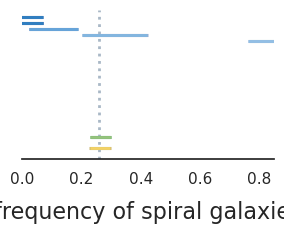

In [4]:
# 示例调用
dataset_name = "galaxies"
data = load_dataset('./data/', dataset_name)
Y_total = data["Y"]
Yhat_total = data["Yhat"]

alpha = 0.1

method = "mean"

# dataset_dist = 'IID'
dataset_dist = 'Non-IID'

# num_ratio = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# num_ratio = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  # 数据量分布平衡
num_ratio = [1,1,1,1,1]
# num_ratio = [1,1,1,1,4]  # 数据量分布不平衡
# num_ratio = [4,1,1,1,1]

# 计算标注真实值、各节点上、组合数据后和FL后的平均值cpp
true_theta, cpp_intervals, ppi_ci_combined, mean_cpp = analyze_dataset(alpha, None, Y_total, Yhat_total, dataset_dist,
                                                                            num_ratio, method, grid=None)
# 画图
file_name = dataset_dist + '-' + dataset_name + '.pdf'
xlim = [0, 0.85]  # max0.85
ylim = [0, 1.0]
# title = "frequency of spiral galaxies \n with partition [4:1:1:1:1]"
title = "frequency of spiral galaxies"
plot_cpp(true_theta, cpp_intervals, ppi_ci_combined, mean_cpp, file_name, xlim, ylim, title)